# Get GPR SWE

In [1]:
# Import PointMeasurements
from snowexsql.api import PointMeasurements
import geopandas as gpd
from shapely.geometry import box, Point
geom_dir = '~/shared-public/swesarr_project/base-layers/swesarr-roi.shp'
geom = gpd.read_file(geom_dir)
geom = geom.to_crs('epsg:26912')
df = PointMeasurements.from_area(
    type="swe",
    shp=geom.iloc[0].geometry,
    instrument='pulse EKKO Pro multi-polarization 1 GHz GPR',
    limit = 1000000,
)


df


,version_number,equipment,value,latitude,longitude,northing,easting,elevation,utm_zone,geom,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,None,None,199.513799,39.021124,-108.205351,4.322837e+06,741941.641028,None,12,POINT (741941.641 4322837.344),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116822,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
1,None,None,199.513799,39.021124,-108.205351,4.322837e+06,741941.627028,None,12,POINT (741941.627 4322837.338),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116823,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
2,None,None,199.513799,39.021124,-108.205352,4.322837e+06,741941.613028,None,12,POINT (741941.613 4322837.331),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116824,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
3,None,None,212.814718,39.021122,-108.205358,4.322837e+06,741941.045028,None,12,POINT (741941.045 4322837.132),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116852,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
4,None,None,212.814718,39.021122,-108.205359,4.322837e+06,741941.007028,None,12,POINT (741941.007 4322837.122),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116853,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230421,None,None,129.540800,39.019973,-108.203501,4.322715e+06,742105.815675,None,12,POINT (742105.816 4322714.553),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219128,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell
230422,None,None,129.540800,39.019971,-108.203501,4.322714e+06,742105.799507,None,12,POINT (742105.800 4322714.253),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219129,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell
230423,None,None,138.035258,39.019968,-108.203501,4.322714e+06,742105.783424,None,12,POINT (742105.783 4322713.954),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219130,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell
230424,None,None,139.466546,39.019965,-108.203502,4.322714e+06,742105.767255,None,12,POINT (742105.767 4322713.654),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219131,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell


<Axes: xlabel='easting', ylabel='northing'>

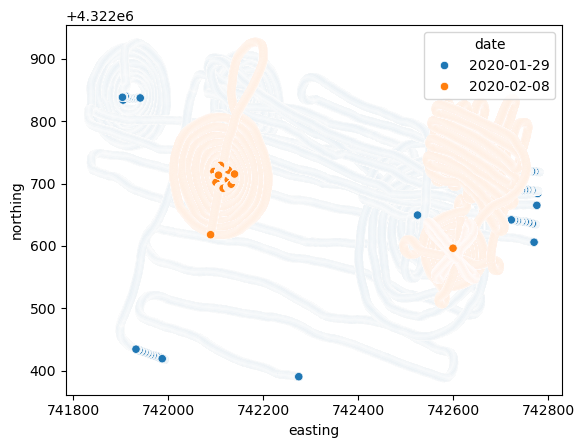

In [2]:
import seaborn as sns
sns.scatterplot(y = 'northing', x = 'easting', hue = 'date', data = df)

# Get ASO SWE

In [7]:
# import in the raster measurments class
from snowexsql.api import RasterMeasurements
from datetime import datetime 
from rasterio.plot import show
# Grab available dates
dates = RasterMeasurements.from_unique_entries(["date"], observers='ASO Inc.', type='swe') # depth
dt = dates[0]
dates


[datetime.date(2020, 2, 2), datetime.date(2020, 2, 13)]

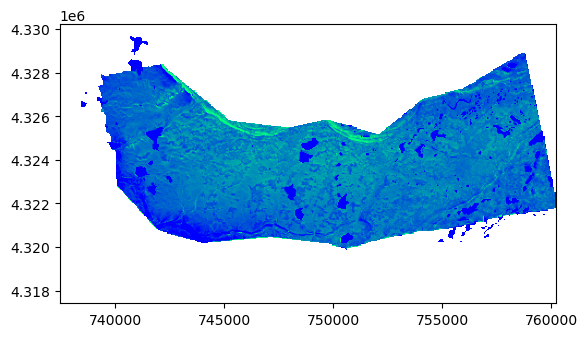

(50.000101089121436, 50.000101089121436)

In [4]:
# Pick a date
dt = datetime(2020, 2, 13)
dt = datetime(2020, 2, 2)

# Query db filtering to swe on a certain date surveyed by ASO
ds = RasterMeasurements.from_filter(observers='ASO Inc.', date = dt, type='swe')
# Plot it up!
show(ds[0], vmin=0.1, vmax=0.4, cmap='winter')

# Note the resolution!
ds[0].res

# Get canopy height

In [5]:
bounds

NameError: name 'bounds' is not defined

[]


TypeError: Invalid shape (0,) for image data

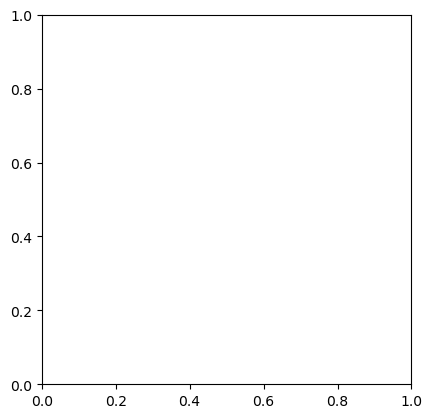

In [37]:
import matplotlib.pyplot as plt
#Extract x/y limits from GPR data --> these will be used when loading the lidar snow depths
bounds = df.total_bounds

# Create a bounding box
gpr_limits = box(*bounds)


# 1.3 Load Lidar vegetation/canopy heights --> This may take a few minutes
#Read in the canopy heights raster from Farmer's Loop/Creamer's Field Alaska
flcf_ch = RasterMeasurements.from_area(shp = gpr_limits, crs=26906,
    buffer=None, type='canopy_height',
    site_name='farmers-creamers',
    observers='chris larsen')
print(flcf_ch)

#Plot the datasets
fig, ax = plt.subplots()
show(flcf_ch, ax=ax, cmap='Greens', clim=(0,5), title = 'Canopy Height (m)')
#Plot the GPR points on top
# flcf_gpr_df.plot(ax=ax, color='blue', markersize = 10)


# Get FSCA
## Search and Download HLS data 

In [8]:
'''
Query CMR STAC for HLS data given a point location and date range
Return a list of asset filenames for AWS or HTTPS access
Translate to local filenames and download
'''
from datetime import datetime, timedelta
import json
import os
import time
import pandas
import requests
import geopandas as gpd
import boto3
from botocore.exceptions import ClientError
from pystac_client import Client
import rasterio
import rioxarray

def search_stac_for_HLS(geom, dt_min, dt_max, cloudcover_max=80, lim=100, url='https://cmr.earthdata.nasa.gov/stac/LPCLOUD', collections=['HLSL30.v2.0', 'HLSS30.v2.0']):
    # open the catalog
    catalog = Client.open(f'{url}')
    
 # perform the search
    search = catalog.search(
        collections=collections,
        # intersects=pt,
        bbox=geom.total_bounds,  # need to be WGS84 projection
        datetime=dt_min + '/' + dt_max,  # need to be str
        limit=lim
    )
    links = []

    if search.matched() == 0:
        print('No granules found at data from', dt_min, 'to', dt_max)
    else:
        print('Found', search.matched(), 'granules at data from', dt_min, 'to', dt_max)
        item_collection = search.get_all_items()
        
        for i in item_collection:
            if i.properties['eo:cloud_cover'] <= cloudcover_max:
                if len(links) == 0:
                    print(i.properties)
                for a in i.assets:
                    links.append(i.assets[a].href)

    return(links)


In [21]:
# which collections to search
collections = ['HLSL30.v2.0', 'HLSS30.v2.0']

# define the point location/centroid for the HLS tile we want
start_date = datetime(year=2019, day=1, month=11)
end_date = datetime(year=2020, day=15, month=2)

geom_dir = '~/shared-public/swesarr_project/base-layers/swesarr-roi.shp'
geom = gpd.read_file(geom_dir)
geom

,id,geometry
0,0,"POLYGON ((-108.21571 39.02395, -108.19532 39.0..."


In [22]:
hls_links = search_stac_for_HLS(geom, start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))

Found 59 granules at data from 2019-11-01 to 2020-02-15


/srv/conda/envs/notebook/lib/python3.11/site-packages/pystac_client/item_search.py:851: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


{'eo:cloud_cover': 2, 'datetime': '2019-11-01T18:13:16.937Z', 'start_datetime': '2019-11-01T18:13:16.937Z', 'end_datetime': '2019-11-01T18:13:16.937Z'}


In [24]:
print(hls_links[0:10])

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.SZA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B07.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B05.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.VZA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B8A.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B01.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/H

In [25]:
# convert https links to s3 links
s3_links = [l.replace('https://data.lpdaac.earthdatacloud.nasa.gov/', 's3://') for l in hls_links]
s3_links = [l.replace('https://cmr.earthdata.nasa.gov/', 's3://') for l in s3_links]
print(s3_links[0:20])

['s3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.SZA.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B07.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B05.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.VZA.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B8A.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B01.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.SAA.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B04.tif', 's3://lp-prod-protected/HLSS30.020/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T

In [26]:
def fix_links(src_link, src_dirs, dst_dir, meta_dir, add_tile_dir=True):
    dst_link = src_link

    if '.xml' in dst_link:
        dst_link2 = os.path.join(meta_dir, os.path.basename(dst_link))
    else:
        for src_dir in src_dirs:
            dst_link = dst_link.replace(src_dir, dst_dir)
        dst_splits = dst_link.split('/')
        dst_link2 = '/'.join(dst_splits[0:2]) + \
            '/' + dst_splits[3].split('.')[2] + \
            '/' + '/'.join(dst_splits[3:])
    
    return(dst_link2)

#fix_links(s3_links[0], 's3://lp-prod-protected', './HLS_data')
local_links = [fix_links(src_link=l, src_dirs=['s3://lp-prod-protected', 's3://lp-prod-public'], dst_dir='./HLS_data', meta_dir='./HLS_metadata') for l in s3_links]
print(local_links[0:10])

['./HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.SZA.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B07.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B05.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.VZA.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B8A.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B01.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.SAA.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B04.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B11.tif', './HLS_data/T13SBD/HLS.S30.T13SBD.2019305T180511.v2.0/HLS.S30.T13SBD.2019305T180511.v2.0.B10.tif']


In [29]:
from getpass import getpass

bucket = 'lp-prod-protected'

user = getpass(prompt='Enter your NASA Earthdata Login Username')
password = getpass(prompt='Enter your NASA Earthdata Login Password')

s3_cred_endpoint = 'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'
url = requests.get(s3_cred_endpoint, allow_redirects=False).headers['Location']

creds = requests.get(url, auth=(user, password)).json()
session = boto3.Session(aws_access_key_id=creds['accessKeyId'], 
                        aws_secret_access_key=creds['secretAccessKey'], 
                        aws_session_token=creds['sessionToken'], 
                        region_name='us-west-2')


Enter your NASA Earthdata Login Username ········
Enter your NASA Earthdata Login Password ········


In [33]:
# maybe only download the data that is needed 
def make_dirs(dst_links):
    for dst_link in dst_links:
        os.makedirs(os.path.dirname(dst_link), exist_ok=True)
        
make_dirs(local_links)

In [31]:
%%time

s3 = session.client('s3')

def download_data(s3_links, local_links, s3_session):
    s3_links = [l.replace('s3://', '') for l in s3_links]
    
    for i in range(0, len(s3_links)):
        s3_link = s3_links[i]
        s3_bucket = s3_link.split('/')[0]
        s3_link = s3_link.replace(s3_bucket +'/', '')        
        local_link = local_links[i]
        
        # ignore XML files for now, figure out how to get them later because they contain useful information
        if not '.xml' in local_link:
            with open(local_link, 'wb') as f:
                #print(i, s3_bucket, s3_link, local_link)
                s3.download_fileobj(s3_bucket, s3_link, f)


download_data(s3_links, local_links, s3)

CPU times: user 30.6 s, sys: 29.5 s, total: 1min
Wall time: 5min 4s


In [34]:
# create a .csv file of S3 links, local links, and information about each file
stack_df = pandas.DataFrame().from_dict({'S3_links':s3_links, 'local_links':local_links})

# add sensor, tile, dates, bands
for i in range(0, stack_df.shape[0]):
    link = s3_links[i]
    if (not '.xml' in link) & (not '.png' in link):
        stack_df.loc[i, 'sensor'] = os.path.basename(link).split('.')[1]
        stack_df.loc[i, 'tile'] = os.path.basename(link).split('.')[2]
        stack_df.loc[i, 'date'] = os.path.basename(link).split('.')[3]
        stack_df.loc[i, 'band'] = os.path.basename(link).split('.')[6]
        
stack_df.to_csv('./HLS_data/stack_train.csv', index=False)


## Map snow cover using NDSI

In [11]:
import numpy as np
import pandas as pd
stack_df = pd.read_csv('./HLS_data/stack_train.csv')
stack_df = stack_df.dropna(subset = ['date'])
stack_df['Date'] = [datetime.strptime(i[0:7], '%Y%j') for i in stack_df['date']]
dates = np.unique(stack_df['Date'])
dates

array(['2019-11-01T00:00:00.000000000', '2019-11-03T00:00:00.000000000',
       '2019-11-06T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-16T00:00:00.000000000',
       '2019-11-19T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2019-12-21T00:00:00.000000000', '2019-12-26T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-02-14T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [12]:
# SWESARR dates: 1104, 1105, 1106, 01-15, 2-11, 2-12
selected_dates = [pd.to_datetime('2019-11-03'), pd.to_datetime('2019-11-06'), 
                  pd.to_datetime('2020-02-14'), pd.to_datetime('2019-01-15')]
selected_df = stack_df[stack_df['Date'].isin(selected_dates)]

## Calculate NDSI and get FSCA

In [13]:
import xarray as xr
import stackstac
import numpy as np
tiles = ['T12SYJ', 'T13SBD']

fn_green = selected_df[selected_df['band'] == 'B03']
fn_swir = selected_df[selected_df['band'] == 'B11']
fn_green
 


,S3_links,local_links,sensor,tile,date,band,Date
52,s3://lp-prod-protected/HLSL30.020/HLS.L30.T13S...,./HLS_data/T13SBD/HLS.L30.T13SBD.2019307T17561...,L30,T13SBD,2019307T175613,B03,2019-11-03
64,s3://lp-prod-protected/HLSL30.020/HLS.L30.T12S...,./HLS_data/T12SYJ/HLS.L30.T12SYJ.2019307T17561...,L30,T12SYJ,2019307T175613,B03,2019-11-03
77,s3://lp-prod-protected/HLSS30.020/HLS.S30.T13S...,./HLS_data/T13SBD/HLS.S30.T13SBD.2019310T18052...,S30,T13SBD,2019310T180529,B03,2019-11-06
103,s3://lp-prod-protected/HLSS30.020/HLS.S30.T12S...,./HLS_data/T12SYJ/HLS.S30.T12SYJ.2019310T18052...,S30,T12SYJ,2019310T180529,B03,2019-11-06
688,s3://lp-prod-protected/HLSS30.020/HLS.S30.T13S...,./HLS_data/T13SBD/HLS.S30.T13SBD.2020045T18043...,S30,T13SBD,2020045T180439,B03,2020-02-14
720,s3://lp-prod-protected/HLSS30.020/HLS.S30.T12S...,./HLS_data/T12SYJ/HLS.S30.T12SYJ.2020045T18043...,S30,T12SYJ,2020045T180439,B03,2020-02-14


In [16]:
FSCA = []
for i in range(len(fn_green)):
    hls_green = xr.open_dataset(fn_green['local_links'].tolist()[i])
    hls_swir = xr.open_dataset(fn_swir['local_links'].tolist()[i])
    ndsi = (hls_green-hls_swir)/(hls_green+hls_swir) 
    FSCA.append(0.5 * (np.tanh(3 * ndsi -1) + 1)) #Gascoin et al., 2020

In [19]:
FSCA

[<xarray.Dataset> Size: 54MB
 Dimensions:      (band: 1, x: 3660, y: 3660)
 Coordinates:
   * band         (band) int64 8B 1
   * x            (x) float64 29kB 2e+05 2e+05 2.001e+05 ... 3.097e+05 3.098e+05
   * y            (y) float64 29kB 4.4e+06 4.4e+06 4.4e+06 ... 4.29e+06 4.29e+06
     spatial_ref  int64 8B 0
 Data variables:
     band_data    (band, y, x) float32 54MB 0.002358 0.007148 0.01816 ... nan nan,
 <xarray.Dataset> Size: 54MB
 Dimensions:      (band: 1, x: 3660, y: 3660)
 Coordinates:
   * band         (band) int64 8B 1
   * x            (x) float64 29kB 7e+05 7e+05 7e+05 ... 8.097e+05 8.097e+05
   * y            (y) float64 29kB 4.4e+06 4.4e+06 4.4e+06 ... 4.29e+06 4.29e+06
     spatial_ref  int64 8B 0
 Data variables:
     band_data    (band, y, x) float32 54MB 0.00039 0.0003961 ... nan nan,
 <xarray.Dataset> Size: 54MB
 Dimensions:      (band: 1, x: 3660, y: 3660)
 Coordinates:
   * band         (band) int64 8B 1
   * x            (x) float64 29kB 2e+05 2e+05 2.001e+0

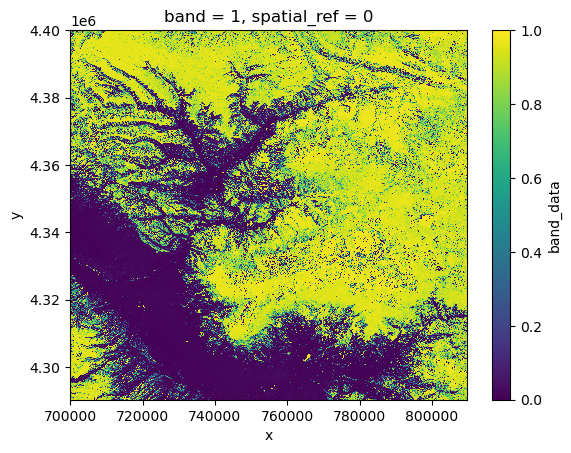

In [21]:
FSCA['band_data'].plot()

In [22]:
FSCA

<xarray.Dataset> Size: 54MB
Dimensions:      (band: 1, x: 3660, y: 3660)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 7e+05 7e+05 7e+05 ... 8.097e+05 8.097e+05
  * y            (y) float64 29kB 4.4e+06 4.4e+06 4.4e+06 ... 4.29e+06 4.29e+06
    spatial_ref  int64 8B 0
Data variables:
    band_data    (band, y, x) float32 54MB 0.005734 0.00737 ... 0.04447 0.8894

## Save data to GeoTiff

In [17]:
fn = rioxarray.open_rasterio(fn_green['local_links'].tolist()[i])
target_crs = 'EPSG:32613'
transform = fn.rio.transform()
data = sca['band_data'].isel(band=0)

# sca['band_data'].hvplot.image('x','y',crs = target_crs)

In [19]:
data = FSCA['band_data'][0]
with rasterio.open('./test.tif', 'w', driver='GTiff', height=data.shape[0],
                               width=data.shape[1], count=1, dtype=str(data.dtype),
                               crs=target_crs, transform=transform) as dst:
                dst.write(data, 1)

# Get SWESARR data

In [39]:
# Import several libraries. 
# comments to the right could be useful for local installation on Windows.

from shapely import speedups      # https://www.lfd.uci.edu/~gohlke/pythonlibs/
#speedups.disable()                # <-- handle a potential error in cartopy

import requests                   # !conda install -c anaconda requests 

# raster manipulation libraries
import rasterio                   # https://www.lfd.uci.edu/~gohlke/pythonlibs/
from osgeo import gdal            # https://www.lfd.uci.edu/~gohlke/pythonlibs/
import cartopy.crs as ccrs        # https://www.lfd.uci.edu/~gohlke/pythonlibs/
import rioxarray as rxr           # !conda install -c conda-forge rioxarray
import xarray as xr               # !conda install -c conda-forge xarray dask netCDF4 bottleneck

# SnowEx Pit Data!
from snowexsql.api import LayerMeasurements # pip install snowexsql

# plotting tools
from matplotlib import pyplot     # !conda install matplotlib
import datashader as ds           # https://www.lfd.uci.edu/~gohlke/pythonlibs/
import hvplot.xarray              # !conda install hvplot
import hvplot.pandas
import holoviews as hv

# append the subfolders of the current working directory to pythons path
import os, sys, glob

swesarr_subdirs = ["data", "util"]
tmp = [sys.path.append(os.getcwd() + "/" + sd) for sd in swesarr_subdirs]
del tmp # suppress Jupyter notebook output, delete variable

# lambda functions!
to_nl = lambda a: 10**(a/10)
to_db = lambda a: 10*np.log10(a)

# settings to make matplotlib look nicer!
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 4.5) # (w, h)

#############################################
# Suppress Warnings for Cleaner Output      #
# (Address Warnings in future update)       #
import warnings                             #
warnings.filterwarnings('ignore')           #
#############################################

from helper import get_out_dir, gdal_corners, join_files, join_sar_radiom, filt_pit_to_sar, filt_radiom_points, sar_swe_plot, radiom_swe_plot, rough_radiom_area

In [42]:
# select files to download

# SWESARR data website
source_repo = 'https://glihtdata.gsfc.nasa.gov/files/radar/SWESARR/prerelease/'

# Example flight line
flight_line = 'GRMCT2_31801_20007_016_200211_225_XX_01/'

# SAR files within this folder
data_files = [
    'GRMCT2_31801_20007_016_200211_09225VV_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_09225VH_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_13225VV_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_13225VH_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_17225VV_XX_01.tif',
    'GRMCT2_31801_20007_016_200211_17225VH_XX_01.tif'
]

# store the location of the SAR tiles as they're located on the SWESARR data server
remote_tiles = [source_repo + flight_line + d for d in data_files]

# create, locate, or move file output directory based on operating system
output_dir = get_out_dir()

# store individual TIF files locally on our computer / server
output_paths = [output_dir + d for d in data_files]



output directory prepared!


In [43]:
output_paths

['/tmp/GRMCT2_31801_20007_016_200211_09225VV_XX_01.tif',
 '/tmp/GRMCT2_31801_20007_016_200211_09225VH_XX_01.tif',
 '/tmp/GRMCT2_31801_20007_016_200211_13225VV_XX_01.tif',
 '/tmp/GRMCT2_31801_20007_016_200211_13225VH_XX_01.tif',
 '/tmp/GRMCT2_31801_20007_016_200211_17225VV_XX_01.tif',
 '/tmp/GRMCT2_31801_20007_016_200211_17225VH_XX_01.tif']

In [44]:
##    for each file selected, store the data locally 
##
##    only run this block if you want to store data on the current 
##    server/hard drive this notebook is located.
##
################################################################

# Search data directory for all tifs
cur_tifs = glob.glob(output_dir + '*.tif', recursive=True)

if not cur_tifs:
    for remote_tile, output_path in zip(remote_tiles, output_paths):
        
        # download data
        r = requests.get(remote_tile)
    
        # Store data (~= 65 MB/file)
        if r.status_code == 200:
            with open(output_path, 'wb') as f:
                f.write(r.content)

In [47]:
# Set clim directly:
clim=(-25,5)
cmap='gray'
crs = ccrs.UTM(zone='12') #12n
tiles='OSM'
tiles='EsriImagery'
transparent_tile = hv.Tiles('https://server.arcgisonline.com/ArcGIS/rest/services/Reference/World_Reference_Overlay/MapServer/tile/{Z}/{Y}/{X}', name="EsriReference").opts(alpha=0.0)
frame_width  = 500
frame_height = 500

sar_data = join_files(output_paths)
sar_data

# create an image for SAR data!
sar_img = sar_data.hvplot.image(x='x',y='y',groupby='band',cmap=cmap,clim=clim,rasterize=True,
                       xlabel='Longitude',ylabel='Latitude',
                       frame_height=frame_height, frame_width=frame_width,
                    xformatter='%.1f',yformatter='%.1f', crs=crs, tiles=tiles, alpha=0.8)


# # create an image for snow pit data!
# pit_img = point_swe_filt.hvplot.points('lon', 'lat',  geo=True, color='swe', alpha=0.8,
#                         tiles=transparent_tile, frame_height=frame_height, frame_width=frame_width, crs=crs, hover_cols=['site_id'],
#                         cmap='Reds')


:DynamicMap   [band]
   :Overlay
      .WMTS.I  :WMTS   [Longitude,Latitude]
      .Image.I :Image   [x,y]   (value)

In [ ]:
# Set clim directly:
clim=(-25,5)
cmap='gray'
crs = ccrs.UTM(zone='12') #12n
tiles='OSM'
tiles='EsriImagery'
transparent_tile = hv.Tiles('https://server.arcgisonline.com/ArcGIS/rest/services/Reference/World_Reference_Overlay/MapServer/tile/{Z}/{Y}/{X}', name="EsriReference").opts(alpha=0.0)
frame_width  = 500
frame_height = 500

sar_img = sar_data.hvplot.image(x='x',y='y',groupby='band',cmap=cmap,clim=clim,rasterize=True,
                       xlabel='Longitude',ylabel='Latitude',
                       frame_height=frame_height, frame_width=frame_width,
                    xformatter='%.1f',yformatter='%.1f', crs=crs, tiles=tiles, alpha=0.8)

# Get iSnobal SWE

# Compare SWE